In [ ]:
###################################################################################################
#--- Muhammed Uwais
#--- Eduv136908

In [ ]:
######################################## Question 1 ###############################################
#--- 1(a)



In [31]:
# importing required packages 

import pandas as pd

# reading data into dataframe 
customer_df = pd.read_csv("customers.csv")

#printing 61 rows of the dataset
customer_df.head(60)

,customer_id,name,age,city,country,subscription_date
0,1,John Rivers,31,New Angela,Sao Tome and Principe,2024-09-17
1,2,Richard Mcclure,21,Jamieside,Svalbard & Jan Mayen Islands,2021-07-19
2,3,Eric Smith,34,Port Mariastad,Nicaragua,2025-06-08
3,4,Megan Price,47,South Samantha,Turkey,2021-12-09
4,5,Pedro Guzman,20,South Laurabury,Mauritius,2023-03-11
5,6,Thomas Morgan,61,Hannahland,Saint Martin,2022-05-08
6,7,Derek Lewis,36,East Jennifer,Norway,2021-01-29
7,8,James Fuentes,26,New Larry,Iceland,2023-01-30
8,9,Karen Pace,48,Daniellefort,Netherlands Antilles,2020-11-24
9,10,Austin Beck,69,Valerietown,Belarus,2022-08-02


In [16]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    int64 
 1   name               100 non-null    object
 2   age                100 non-null    int64 
 3   city               100 non-null    object
 4   country            100 non-null    object
 5   subscription_date  100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [17]:
customer_df.describe()

,customer_id,age
count,100.000000,100.000000
mean,50.500000,44.700000
std,29.011492,17.469454
min,1.000000,18.000000
25%,25.750000,28.750000
50%,50.500000,46.000000
75%,75.250000,61.000000
max,100.000000,75.000000


In [ ]:
######################################## Question 1 ###############################################
#--- 1(b)



In [34]:
# Before I begin cleaning, I want to understand my min() and max() values for subscription date
first_date = customer_df['subscription_date'].min()
print(first_date)


last_date = customer_df['subscription_date'].max()
print(last_date)


2020-10-13 00:00:00
2025-08-24 00:00:00


In [35]:
# converting subscription_date into the right timedate format

customer_df['subscription_date'] = pd.to_datetime(customer_df['subscription_date'],errors='coerce')

In [43]:
# I seperated the date to a better format for data analysis 


s = customer_df['subscription_date']
customer_df['year']  = s.dt.year
customer_df['month'] = s.dt.month
customer_df['day']   = s.dt.day

In [44]:
#verfying 

customer_df.head()

,customer_id,name,age,city,country,subscription_date,year,month,day
0,1,John Rivers,31,New Angela,Sao Tome and Principe,2024-09-17,2024,9,17
1,2,Richard Mcclure,21,Jamieside,Svalbard & Jan Mayen Islands,2021-07-19,2021,7,19
2,3,Eric Smith,34,Port Mariastad,Nicaragua,2025-06-08,2025,6,8
3,4,Megan Price,47,South Samantha,Turkey,2021-12-09,2021,12,9
4,5,Pedro Guzman,20,South Laurabury,Mauritius,2023-03-11,2023,3,11


In [ ]:
######################################## Question 1 ###############################################
#--- 1(c)



In [50]:
# checking to see who is the youngest in the datset, this helps me understand y dataset

youngest_age = customer_df['age'].min()
print(youngest_age)

18


In [55]:

# Because this dataset was being used for marketing campaigns, I decided to sperate the age groups into their
# generations. This would make it easier to determine profiles and lead better campaigns.


customer_df['birth_year'] = 2025 - customer_df['age']


bins = [1964, 1980, 1996, 2012]
labels = ['Generation X', 'Millennial', 'Generation Z']


customer_df['generation'] = pd.cut(
    customer_df['birth_year'],
    bins=bins,
    labels=labels
)

In [56]:
customer_df.head()

,customer_id,name,age,city,country,subscription_date,year,month,day,birth_year,generation
0,1,John Rivers,31,New Angela,Sao Tome and Principe,2024-09-17,2024,9,17,1994,Millennial
1,2,Richard Mcclure,21,Jamieside,Svalbard & Jan Mayen Islands,2021-07-19,2021,7,19,2004,Generation Z
2,3,Eric Smith,34,Port Mariastad,Nicaragua,2025-06-08,2025,6,8,1991,Millennial
3,4,Megan Price,47,South Samantha,Turkey,2021-12-09,2021,12,9,1978,Generation X
4,5,Pedro Guzman,20,South Laurabury,Mauritius,2023-03-11,2023,3,11,2005,Generation Z


In [ ]:
######################################## Question 1 ###############################################
#--- 1(c)



C:\Users\muham\AppData\Local\Temp\ipykernel_9272\3459298519.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = customer_df.resample('M', on='subscription_date').size()


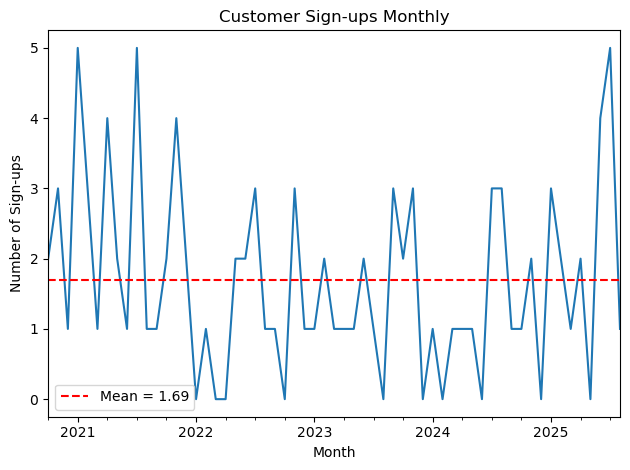

In [60]:


# importing required libary
# I wanted to compare monthly sign ups and obtain a value we could use 
import matplotlib.pyplot as plt
import pandas as pd


customer_df['subscription_date'] = pd.to_datetime(customer_df['subscription_date'], errors='coerce')

monthly_counts = customer_df.resample('M', on='subscription_date').size()

mean_value = monthly_counts.mean()

plt.figure()
monthly_counts.plot()

plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean_value:.2f}')

plt.title('Customer Sign-ups Monthly')
plt.xlabel('Month')
plt.ylabel('Number of Sign-ups')

plt.legend()
plt.tight_layout()
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_9272\3301270870.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_counts = customer_df.resample('Q', on='subscription_date').size()


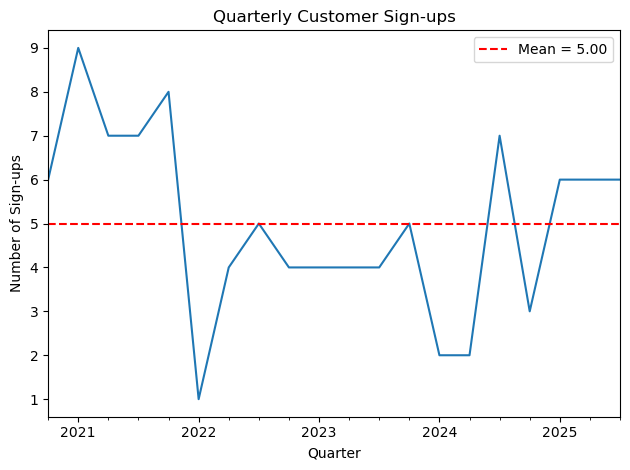

In [59]:
import matplotlib.pyplot as plt
import pandas as pd


customer_df['subscription_date'] = pd.to_datetime(customer_df['subscription_date'], errors='coerce')

quarterly_counts = customer_df.resample('Q', on='subscription_date').size()

mean_value = quarterly_counts.mean()

plt.figure()
quarterly_counts.plot()

plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean_value:.2f}')

plt.title('Quarterly Customer Sign-ups')
plt.xlabel('Quarter')
plt.ylabel('Number of Sign-ups')

plt.legend()
plt.tight_layout()
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_9272\3517244167.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'generation'])


<Figure size 640x480 with 0 Axes>

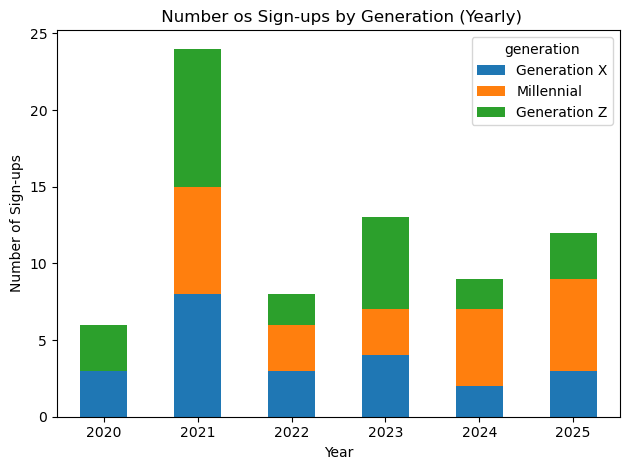

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by year and generation, then unstack into columns per generation
year_gen = (
    customer_df
    .groupby(['year', 'generation'])
    .size()
    .unstack(fill_value=0)
    .sort_index()      # ensures years appear in order
)

# Plot (one chart only)
plt.figure()
year_gen.plot(kind='bar', stacked=True)
plt.title(' Number os Sign-ups by Generation (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
######################################## Question 1 ###############################################
#--- 1(c)



In [65]:
import pandas as pd

# 1) Select only the clean and relevant columns
cleaned_df = customer_df[['name', 'age', 'city', 'country', 'subscription_date', 'generation']].copy()

# 2) Save the cleaned version to CSV (without the index column)
cleaned_df.to_csv('customers_cleaned.csv', index=False)


from IPython.display import FileLink

# Create a clickable download link inside your notebook
FileLink('customers_cleaned.csv')


C:\Users\muham\DataScience_Project_env\Question_1\customers_cleaned.csv